In [1]:
import sys
sys.path.append("../")
import net_celebA
import chainer
import numpy as np
from glob import glob
import data
import chainer.serializers as S
import matplotlib.pyplot as plt
from PIL import Image
import os
import scipy.misc

In [2]:
e = net_celebA.Encoder()
d = net_celebA.Decoder()
m = "../results/model/epoch5_iter13000"
S.load_npz(m+ ".enc", e)
S.load_npz(m +".dec", d)

In [3]:
files = np.array(glob("/home/oyamada/database/img_align_celeba/*.jpg"))

In [4]:
np.random.seed(100)
num_all = len(files)
num_train = int(num_all * 0.9)
num_test = num_all - num_train
id_all = np.random.choice(num_all, num_all, replace=False)
id_test = id_all[:num_test]
id_train = id_all[num_test:]
files_train, files_test = files[id_train], files[id_test]


In [5]:
# x = data.load(files_train[:10])
x = data.load(files_test[:10])

In [6]:
with chainer.using_config("train", False):
    q_z = e(x)
    z = q_z.sample(1)
    x_hat = d(z)

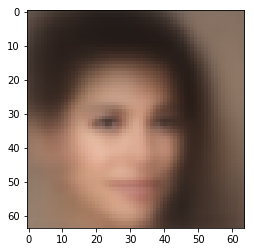

In [14]:
plt.imshow((x_hat.data[6].transpose([1, 2, 0]) + 1) / 2)

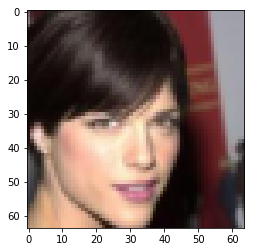

In [15]:
plt.imshow((x[6].transpose((1, 2, 0)) + 1)/2)

In [71]:
x = np.array(Image.open(files_train[50]))[(218-148)//2:(218-148)//2+148, (178-148)//2:(178-148)//2+148]

/home/oyamada/.pyenv/versions/3.6.5/envs/chainerV5/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


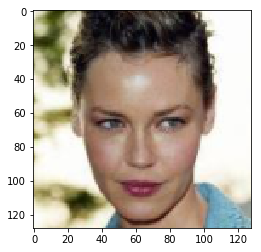

In [74]:
plt.imshow(scipy.misc.imresize(x, [128, 128]))

In [4]:
h_min = 100000000
w_min = 100000000
for f in files:
    h, w, _ = np.array(Image.open(f)).shape
    if h < h_min:
        h_min = h
    if w < w_min:
        w_min = w

In [5]:
h_min

218

In [6]:
w_min

178